# Simple salary analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
data = pd.read_csv('./salary_data.csv')

## Explore data

In [3]:
# Display the first few rows of the dataset to get a quick overview of columns and sample values
data.head()

,Employee,Department,Salary,Years_of_Experience
0,Ivan,IT,3300.0,1.0
1,Maria,Marketing,2700.0,1.0
2,Georgi,IT,3900.0,3.0
3,Elena,Finance,3100.0,2.0
4,Petar,Marketing,2850.0,2.0


In [4]:
# Display a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee             48 non-null     object 
 1   Department           47 non-null     object 
 2   Salary               47 non-null     float64
 3   Years_of_Experience  47 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.6+ KB


In [5]:
# Show summary statistics for numerical columns (count, mean, std, min, 25%, 50%, 75%, max)
data.describe()

,Salary,Years_of_Experience
count,47.000000,47.000000
mean,5034.042553,9.574468
std,1253.131139,4.906715
min,2700.000000,1.000000
25%,4250.000000,6.000000
50%,4950.000000,10.000000
75%,6150.000000,13.500000
max,7100.000000,18.000000


In [6]:
# Get top 3 highest-paid employees per department and set Department as the index
data.groupby('Department', group_keys=False).apply(
    lambda x: x.nlargest(3, 'Salary')
).set_index('Department')

,Employee,Salary,Years_of_Experience
Department,,,
Finance,Aneliya,6650.0,18.0
Finance,Silviya,6550.0,17.0
Finance,Rumen,6450.0,16.0
IT,Hristina,7100.0,18.0
IT,Tanya,7050.0,17.0
IT,Violeta,6900.0,16.0
Marketing,Boyan,5000.0,15.0
Marketing,Kristiyan,4950.0,14.0
Marketing,Stefka,4800.0,13.0


## Visualize data

### Number of Employees by Department

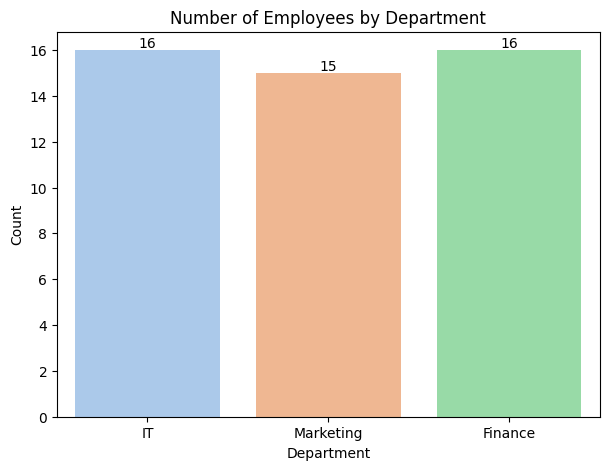

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='Department', hue='Department', palette='pastel', legend=False)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show()

### Salary Distribution by Department

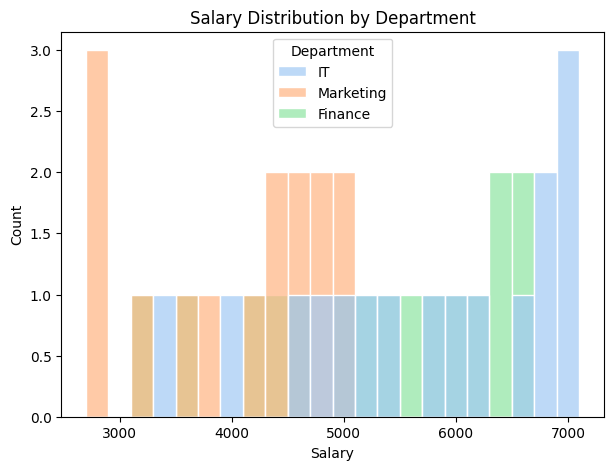

In [8]:
plt.figure(figsize=(7,5))
sns.histplot(data=data, x='Salary', hue='Department', binwidth=200,
             edgecolor='white', alpha=0.7, kde=False, palette="pastel")
plt.title("Salary Distribution by Department")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

**Insightes**:

This histogram compare salary distributions between departments and identify patterns like whether IT salaries are generally higher than Marketing, or if departments have similar or different salary spreads.

### Salary vs Years of Experience by Department

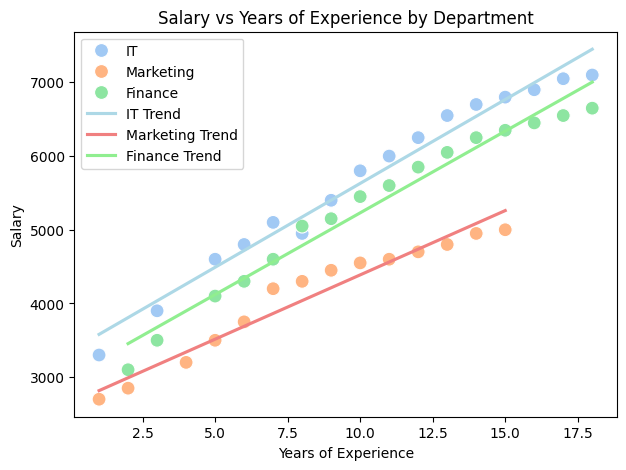

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="Years_of_Experience", y="Salary", hue="Department", s=100, palette="pastel")

sns.regplot(data=data[data["Department"]=="IT"], x="Years_of_Experience", y="Salary", scatter=False, label="IT Trend", color="lightblue", ci=None)
sns.regplot(data=data[data["Department"]=="Marketing"], x="Years_of_Experience", y="Salary", scatter=False, label="Marketing Trend", color="lightcoral", ci=None)
sns.regplot(data=data[data["Department"]=="Finance"], x="Years_of_Experience", y="Salary", scatter=False, label="Finance Trend", color="lightgreen", ci=None)

plt.title("Salary vs Years of Experience by Department")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

**Insights**: 

This chart compares salary progression by experience across departments. The regression lines show which departments have steeper salary growth curves, while individual points reveal the actual distribution and any outliers.

### Average salary by department (bar chart)

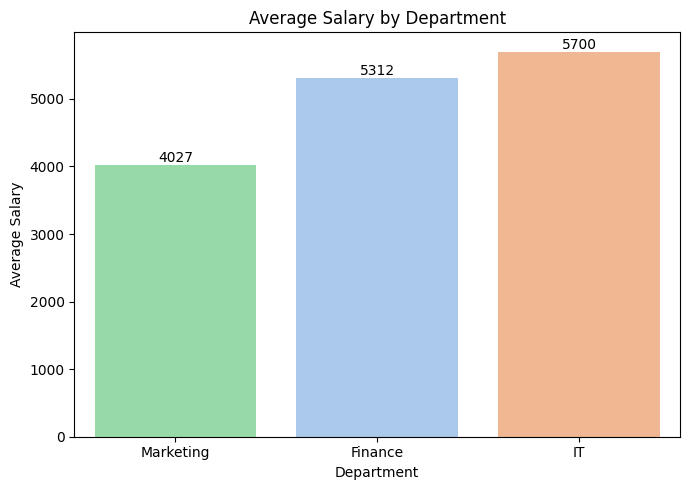

In [10]:
fig, ax = plt.subplots(figsize=(7,5))

# Create a color mapping for each department (excluding NaN)
dept_order = sorted(data['Department'].dropna().unique())
dept_colors = dict(zip(dept_order, sns.color_palette("pastel", n_colors=len(dept_order))))

avg_salary = data.dropna(subset=['Department']).groupby('Department')['Salary'].mean().sort_values()

colors = [dept_colors[dept] for dept in avg_salary.index]
sns.barplot(x=avg_salary.index, y=avg_salary.values, hue=avg_salary.index,
            palette=colors, ax=ax, legend=False)
ax.set_title('Average Salary by Department')
ax.set_xlabel('Department')
ax.set_ylabel('Average Salary')

for p, val in zip(ax.patches, avg_salary.values):
    ax.annotate(f'{val:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), # type: ignore
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insights**:

This bar chart displays the average salary for each department, sorted from lowest to highest. 

### Average Salary by Department and Experience Level

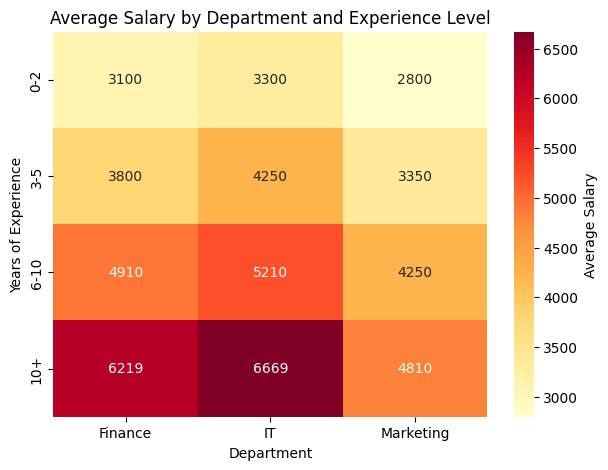

In [11]:
plt.figure(figsize=(7,5))

# Create bins for experience
data['Experience_Group'] = pd.cut(data['Years_of_Experience'], bins=[0,2,5,10,20], labels=['0-2','3-5','6-10','10+'])

pivot_table = data.pivot_table(values='Salary', index='Experience_Group', columns='Department', aggfunc='mean')

sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Average Salary'})
plt.title('Average Salary by Department and Experience Level')
plt.xlabel('Department')
plt.ylabel('Years of Experience')
plt.show()

**Insights**:
 
This heatmap reveals how average salary varies across both department and experience level, with warmer colors indicating higher compensation. It helps identify which departments offer better pay at different career stages and whether salary growth with experience is consistent across all departments.